# **Lab 4**
### Weightage **4%**
# SVM
---
Datasets used: 



1.   Synthetic 2D Datasets
2.   COMPAS Recidivism Dataset



---

Maximum Points in the Lab: **75**

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **April 21st 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In [ ]:
# Import the necessary libraries
import sklearn
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcmap
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd 
import os
import seaborn as sns

In [ ]:
# If COMPAS dataset is to be loaded from Google Drive, use this cell
# If running on local system, remove / comment this block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive


# SVM

---

In this lab you will be using one of the most powerful machine learning models namely Support Vector Machines (SVM) to classify the level of risk associated with granting bail to a person. But before diving into the analysis of this high dimensional real world dataset, we will be doing analyses on low dimensional synthetic datasets with 2 classes for a better understanding. 

# Synthetic Dataset


---

We will first take synthetic 2D datasets to help you visualize and understand how SVM works.

# Helpers

## Preparing for visualization


---

The following block guides you to color code data points in your plots and display the legend as per predicted and true labels. Insert the necessary information as asked in the comments.


---
**2 Points**

---




In [ ]:
# Insert different colors of your choice here
color_1 = 'red'
color_2 = 'green'
color_3 = 'yellow'
color_4 = 'blue'

# Insert different matplotlib markers of your choice here
train_set_marker = 'o'
test_set_marker = '*'

# This dictionary shall be used to color code the points and display legend in plots
colors_info = {color_1 : "class 0 and predicted as 0",
               color_2 : "class 0 and predicted as 1",
                color_3 : "class 1 and predicted as 0",
                color_4    : "class 1 and predicted as 1"}

c_vals = [0.01,0.1,1,10,100]

## Coloring the data points - Custom function

---

Color coding the data points as per their true and predicted labels in the visualization shall give an idea of the way the SVM model perceives the distribution of data points. The following function definition shall be reused to color code the different data points appropriately.


---
**3 Points**

---




In [ ]:
def get_color(pred_label,true_label):
    # Insert your code here to return corresponding color as per the predicted and true label
    if pred_label == true_label:
      if pred_label == 0:
        return color_1
      else:
        return color_4
    else:
      if pred_label == 0:
        return color_3
      else:
        return color_2

## Customised scatter plot

---
We have different types of markers based on whether the data point was in the training set or test set. The following function definition is to create such customised scatter plots.


---
**2 Points**

---





In [ ]:
def plot_colored_scatter_plot(plot_x_axis,plot_y_axis,color_values,marker_type):
    # Insert your code here to generate a customized scatter plot as per given color and marker type

    ## FOR SELF HELP :- color_values is basically an array of size n
    plt.scatter(plot_x_axis, plot_y_axis, marker= marker_type, c = color_values)

## Plotting decision function

---
The following custom function is to plot the decision function learned by the SVM classifier. The decision boundary is to be plotted via bold line and the margins are to be plotted via dotted / dashed lines. The support vectors are to be encircled.


---
**10 Points**

---





In [ ]:
def plot_svc_decision_function(svm_model):

    # Insert your code here to get the complete legend ready
    p_1 = mpatches.Patch(color = color_1, label = colors_info[color_1])
    p_2 = mpatches.Patch(color = color_2, label = colors_info[color_2])
    p_3 = mpatches.Patch(color = color_3, label = colors_info[color_3])
    p_4 = mpatches.Patch(color = color_4, label = colors_info[color_4])
    legend_handles = [p_1, p_2, p_3, p_4]
    
    # Insert your code here to create a grid to plot the data points
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)  
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Insert your code here to get the decision boundary function from the SVM model object (svm_model) 
    Z = svm_model.decision_function(xy).reshape(XX.shape)

    # Insert your code here to plot the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Insert your code here to encircle support vectors in the scatter plot
    ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],s = 150, linewidth=1, facecolors='none', edgecolors='black')
    
    # Insert your code here to show the plot along with the prepared legend.
    # For a cleaner view, it is recommended that you display the legend in a 2 x 2 grid
    plt.legend(handles = legend_handles, loc='upper left', ncol = 2, fontsize='small')
    plt.show()

# Working on the synthetic dataset with SVM classifier

---
Till now the functions you have defined shall be used as helper functions for this section. This is the place where you actually start training the SVM and apply it for classification. Follow the comments for step by step procedure.


---

**10 Points**

---




In [ ]:
def apply_svm_classifier(X,Y,kernel_type,regularization_constant = 1):
    # Insert your code here to split the dataset into train and test sets
    # Keep 20% of the data as the test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

    # Insert your code here to create a SVM classifier object with the given kernel and regularization settings
    clf = SVC(kernel=kernel_type, C=regularization_constant)

    # Insert your code here to train the SVM classifier on the train set 
    clf.fit(X_train, Y_train)

    # Insert your code here to get the labels from the SVM classifier for train set
    X_train_preds = clf.predict(X_train)

    # Insert your code here to get the labels from the SVM classifier for test set
    X_test_preds = clf.predict(X_test)

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the train set
    train_confusion_matrix = confusion_matrix(Y_train, X_train_preds)

    fig = plt.figure(figsize = (8,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_title('Train')
    ax2.set_title('Test')

    cm = confusion_matrix(Y_train, X_train_preds)
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, annot=True, ax=ax1, annot_kws={"size": 12})

    # Insert your code here to display the confusion matrix as per the SVM classifier's predictions on the test set
    test_confusion_matrix = confusion_matrix(Y_test, X_test_preds)
    cm = confusion_matrix(Y_test, X_test_preds)
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, annot=True, ax=ax2, annot_kws={"size": 12})
    
    plt.show()
    plt.close()
    
    # Insert your code here to get color code values for data points as per their predicted and true labels
    train_color = [get_color(X_train_preds[i], Y_train[i]) for i in range(len(X_train_preds))]
    test_color = [get_color(X_test_preds[i], Y_test[i]) for i in range(len(X_test_preds))]
    

    # Insert your code here to generate a colored scatter plot of the training data points
    plt.figure(figsize = (10,10))
    plot_colored_scatter_plot(X_train[:,0], X_train[:,1], train_color, train_set_marker)

    # Insert your code here to generate a colored scatter plot of the test data points
    plot_colored_scatter_plot(X_test[:,0], X_test[:,1], test_color, test_set_marker)

    # Insert your code here to initiate the function call to plot the decision function
    plot_svc_decision_function(clf)

# Creating Synthetic datasets

## Linearly separable dataset

---

First, let us create a linearly separable dataset with 2 classes. To facilitate this `make_blobs()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a linearly separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



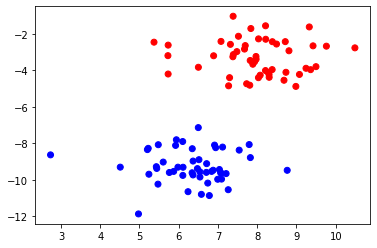

In [ ]:
# Insert your code here to generate perfectly linearly separable data points
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
#cmap = lcmap([color_1, color_4], name = 'from_list')
LABEL_COLOR_MAP = {0 : color_1 ,1 : color_4}

y_color = [LABEL_COLOR_MAP[l] for l in y]

# Insert your code to initiate the function call to generate colored scatter plot of the dataset
plot_colored_scatter_plot(X[:,0], X[:,1], y_color, train_set_marker)

### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic linearly separable dataset.

---
**1 Point**

---




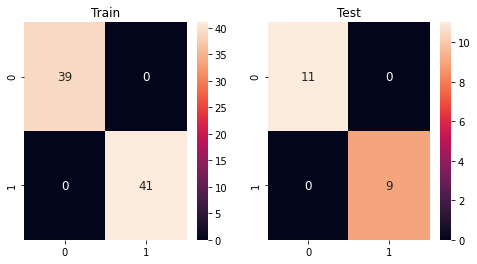

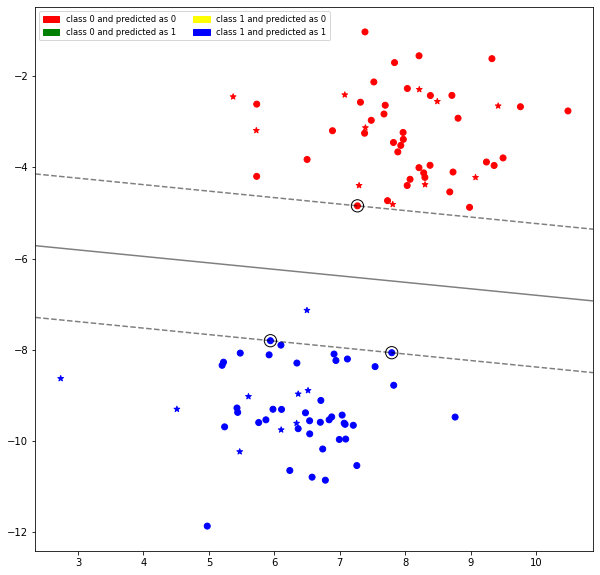

In [ ]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X, y, 'linear')

## Circular separable dataset

---

Now, let us create a circular separable dataset with 2 classes. To facilitate this `make_circles()` in `sklearn` package is provided. By suitabling adjusting the function parameters generate a circular separable dataset and show a scatter plot of the generated data color coded as per true labels.


---

**2 Points**


---



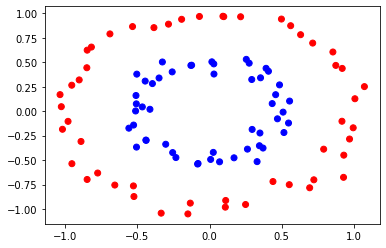

In [ ]:
# Insert your code here to generate perfectly circular separable data points
X, y = make_circles(n_samples=100, random_state=6, factor = 0.5, noise=0.06)
#cmap = lcmap([color_1, color_4], name = 'from_list')
LABEL_COLOR_MAP = {0 : color_1 ,1 : color_4}

y_color = [LABEL_COLOR_MAP[l] for l in y]

# Insert your code to initiate the function call to generate colored scatter plot of the dataset
plot_colored_scatter_plot(X[:,0], X[:,1], y_color, train_set_marker)

### Applying SVM

---

Apply SVM with linear kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---




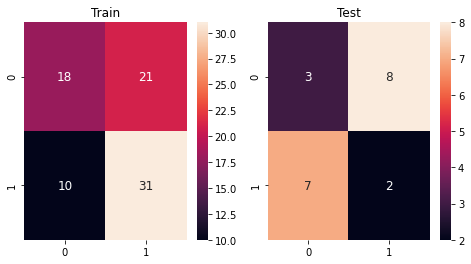

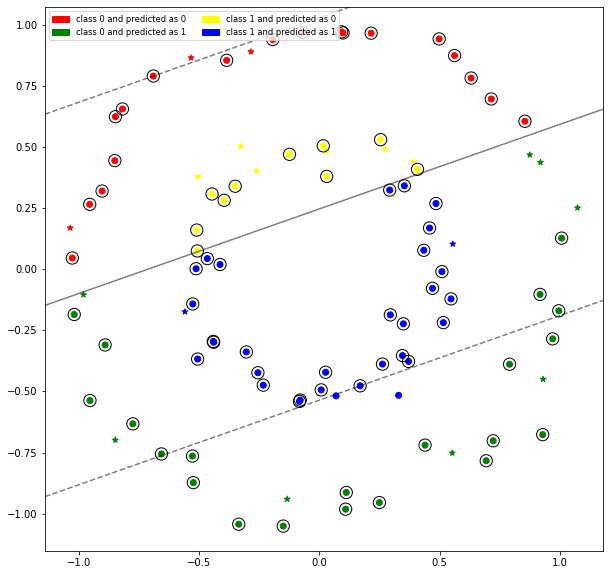

In [ ]:
# Insert your code here to apply a SVM classifier with Linear Kernel
apply_svm_classifier(X, y, 'linear')

## RBF Kernel

---

As expected an SVM with linear kernel cannot model the true circular boundary well. To model circular boundary RBF kernel is to be applied. Apply SVM with RBF kernel to classify the synthetic circular separable dataset.

---
**1 Point**

---


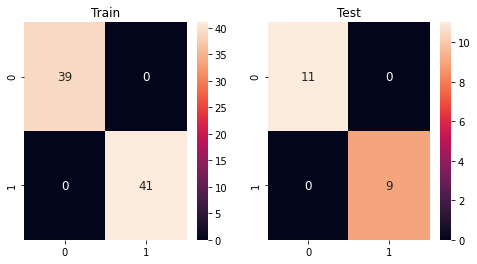

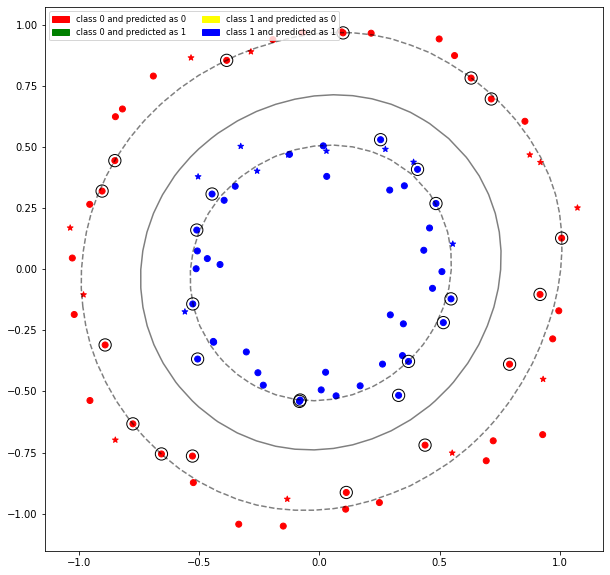

In [ ]:
# Insert your code here to apply a SVM classifier with RBF Kernel
apply_svm_classifier(X, y, 'rbf')

## Inference from support vectors

---

**Comment** on what you infer from the support vectors.



---

 **2 Points**
 
---

**INFERENCES**

We see that linear doesn't model the given dataset well enough. An RBF kernel is able to model the decision boundry well. 

In totality we have 15 support vectors from the red class and 14 from the blue class. Since the SVM has the objective of reducing misclassifications as well as maximizing the margin the support vectors as we can see are responsible for the shape of the decision boundary. We can an elliptical kind of a shape as some blue SV's lie towards the upper left and some red Sv's towards the bottom left, leading the decision boundary to be elongated towards upper-left and compressed towards bottom-left



## Experimenting with regularization constants

---
You have a parameter `C` in the SVM classifier of the `sklearn` package that helps adjust regularization weight. Experiment on various values for this parameter and **comment** your observations.


---

**2 Points**


---



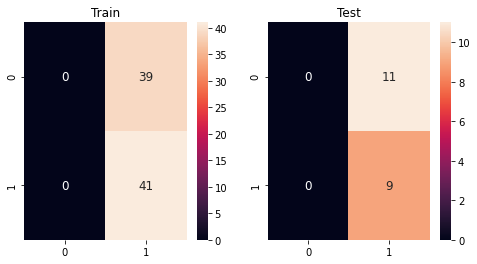

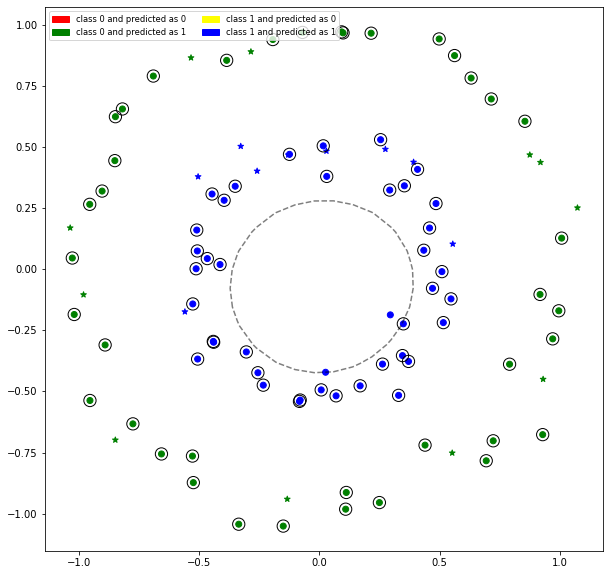

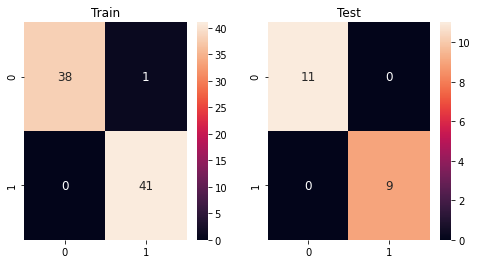

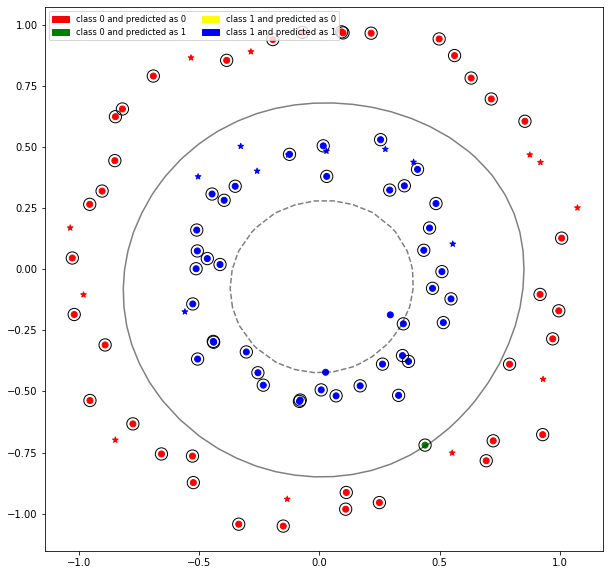

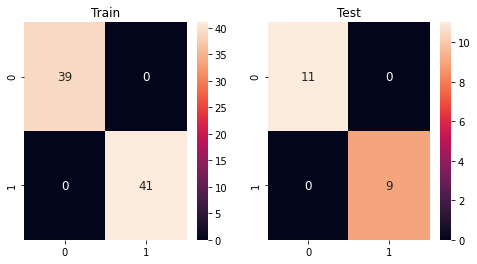

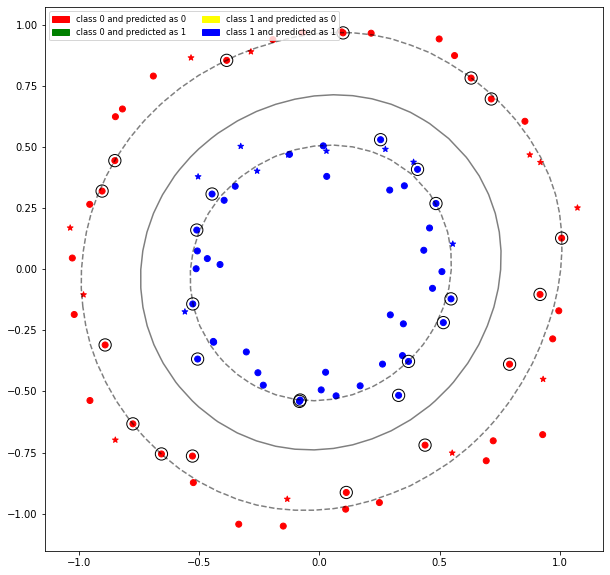

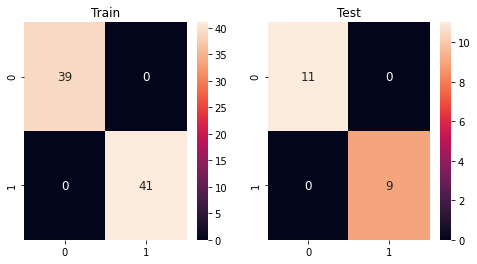

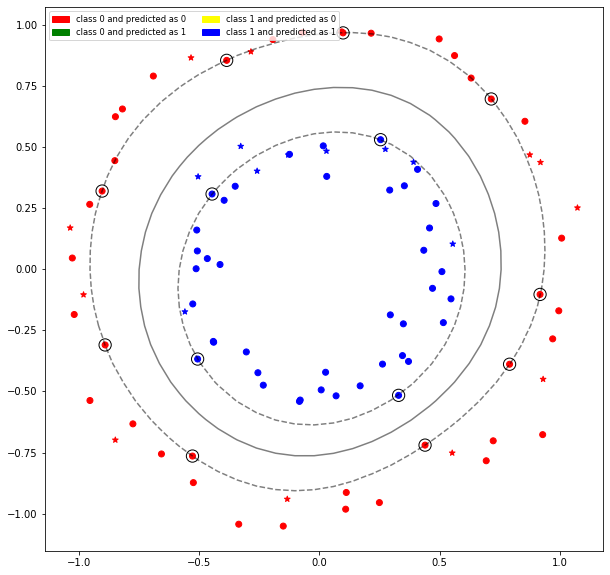

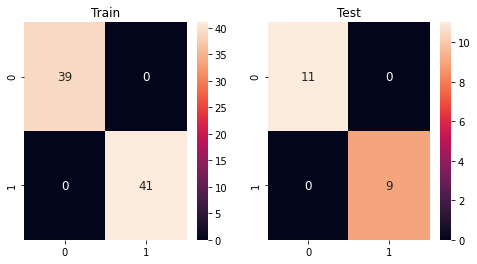

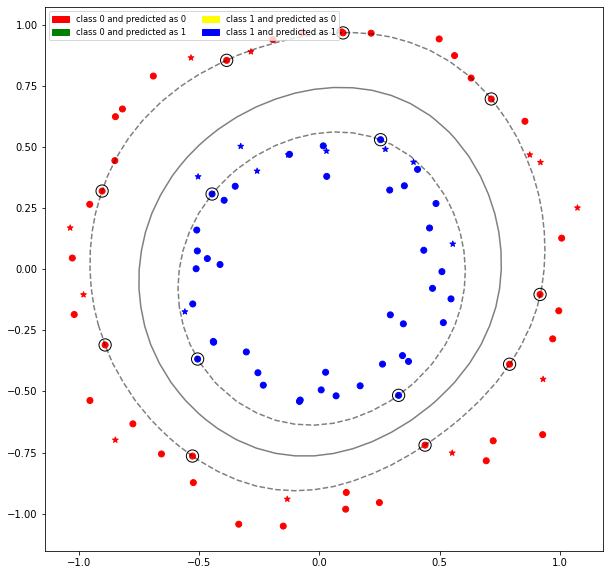

In [ ]:
for c in c_vals:
    # Insert your code here to experiment RBF kernel with different regularization constant values
    apply_svm_classifier(X, y, 'rbf', c)

**INFERENCES**

The c parameter here refers to how much we can reduce the margin to avoid misclassifications. For extremely small values like 0.01, we can tolerate misclassifications but want a large margin and for large values like 1000 we can accept a small margin but less misclassifications.

As a result we can see in the first image, the decision boundary has a large margin but misclassifies an entire class followed by smaller margin but misclassifications are reduced. Further models classify correctly but we can see a difference in their decision boundaries as the margins reduce in size since misclassifications are now more important to avoid

# COMPAS Recedivism dataset

Now that you have worked with synthetic 2D datasets and got yourself familiarised with SVM's, it's time to get your hands dirty working with a real world high dimensional dataset.

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).




# Preprocessing the data

We have to load the data from CSV file. Except for **specifying the file path**, you need not have to do any changes to the block below.


---

**1 Point**

---



In [ ]:
# Specify the path of your COMPAS dataset CSV file as a string here
csv_path = "/content/MyDrive/My Drive/compas-scores-raw.csv"

# Don't modify anything from here
# Load dataset
data_set = pd.read_csv(csv_path)

# Drop unimportant columns 
data_set.drop(["Person_ID", "AssessmentID","AssessmentReason","Case_ID","LastName","FirstName","MiddleName","DateOfBirth","Screening_Date","IsCompleted","IsDeleted","Language","RawScore","DecileScore","AssessmentType"], axis = 1, inplace = True) 
# Display the modified dataset
data_set 


,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
1,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Low
2,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,Low
3,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,Low
4,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,8,Risk of Recidivism,High
60839,Probation,Male,African-American,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,3,Medium with Override Consideration,18,Risk of Failure to Appear,High
60840,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,Low
60841,PRETRIAL,Male,Caucasian,22,Risk and Prescreen,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,Medium


In [ ]:
# Preprocessing continued...
# Don't make any changes to this block
# Transforming the ScoreText into 0, 1, 2, 3
data_set['ScoreText'] = data_set['ScoreText'].map({'Low': 1, 'Medium': 2, 'High': 3})

df_s= pd.DataFrame(data_set.ScoreText)

for index in df_s.index:
     if df_s.iloc[index].ScoreText!=1:
        if df_s.iloc[index].ScoreText!=2:
          if df_s.iloc[index].ScoreText!=3:
            df_s.iloc[index].ScoreText=0

df = pd.DataFrame(data_set)

df.ScoreText=df_s.astype(int)

# Printing number of points corresponding to each class
print(len(df[df['ScoreText'] == 0]))
print(len(df[df['ScoreText'] == 1]))
print(len(df[df['ScoreText'] == 2]))
print(len(df[df['ScoreText'] == 3]))


45
41487
12488
6823


## Histograms Visualization

---


Plot a histogram between the race (Ethnic_Code_Text) and the mean score (ScoreText).


---

**1 Point**

---



Text(0.5, 0, 'Ethnic_Code_Text')

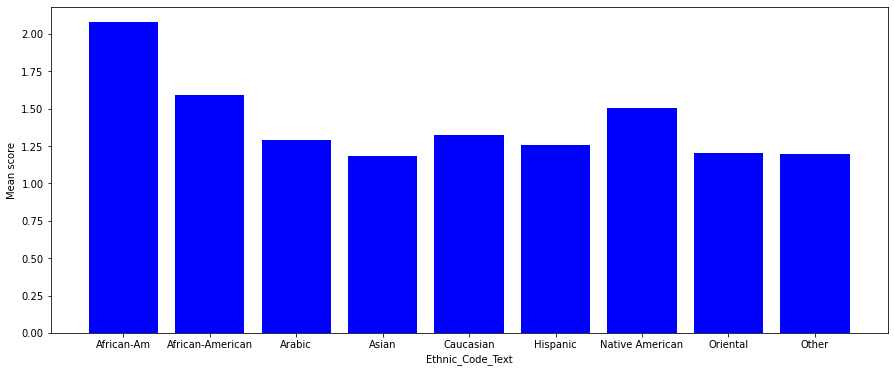

In [ ]:
# Insert your code here to plot a histogram by grouping race (Ethnic_Code_Text) and the mean score (ScoreText)
df1 = df[['Ethnic_Code_Text', 'ScoreText']]
x1 = df1.groupby('Ethnic_Code_Text').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['Ethnic_Code_Text'])
plt.ylabel('Mean score')
plt.xlabel('Ethnic_Code_Text')

Plot a histogram between the legal status (LegalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

Text(0.5, 0, 'LegalStatus')

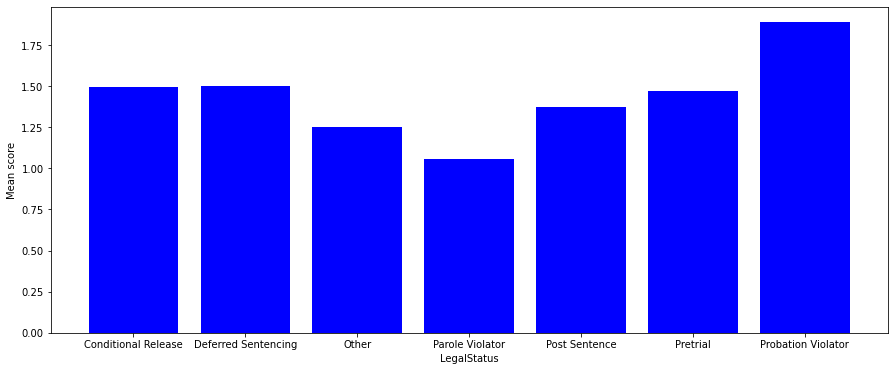

In [ ]:
# Insert your code here to plot a histogram by grouping legal status (LegalStatus) and the mean score (ScoreText)
df1 = df[['LegalStatus', 'ScoreText']]
x1 = df1.groupby('LegalStatus').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['LegalStatus'])
plt.ylabel('Mean score')
plt.xlabel('LegalStatus')

Plot a histogram between the display text (DisplayText) and the mean score (ScoreText).


---

**1 Point**

--- 

Text(0.5, 0, 'DisplayText')

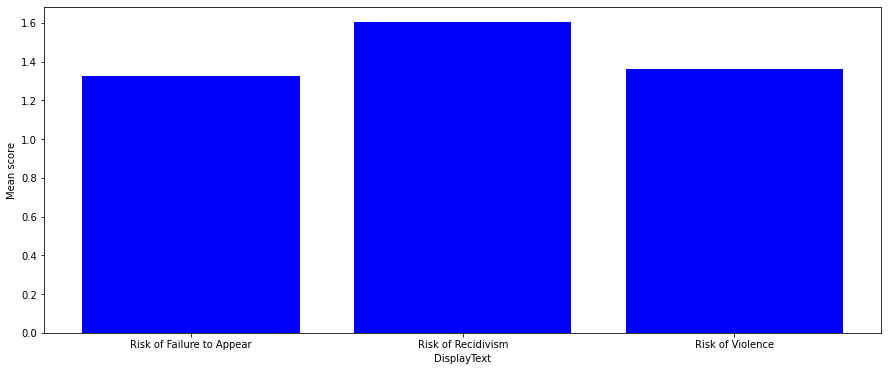

In [ ]:
# Insert your code here to plot a histogram by grouping display text (DisplayText) and the mean score (ScoreText)
df1 = df[['DisplayText', 'ScoreText']]
x1 = df1.groupby('DisplayText').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['DisplayText'])
plt.ylabel('Mean score')
plt.xlabel('DisplayText')

Plot a histogram between the marital status (MaritalStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

Text(0.5, 0, 'MaritalStatus')

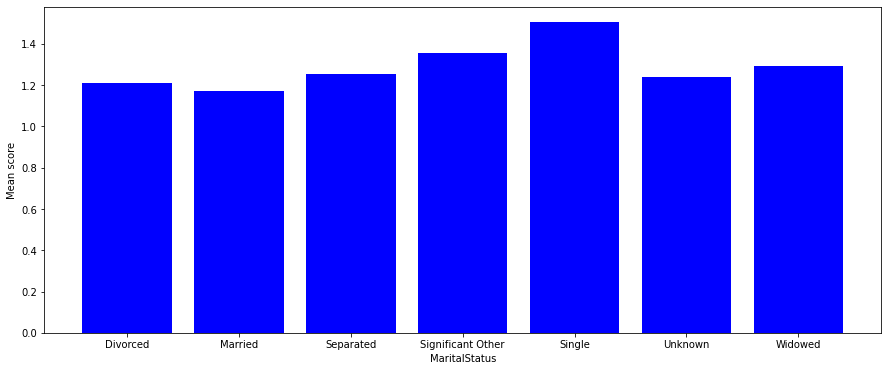

In [ ]:
# Insert your code here to plot a histogram by grouping marital status (MaritalStatus) and the mean score (ScoreText)
df1 = df[['MaritalStatus', 'ScoreText']]
x1 = df1.groupby('MaritalStatus').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['MaritalStatus'])
plt.ylabel('Mean score')
plt.xlabel('MaritalStatus')

Plot a histogram between the recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText).


---

**1 Point**

--- 

Text(0.5, 0, 'RecSupervisionLevelText')

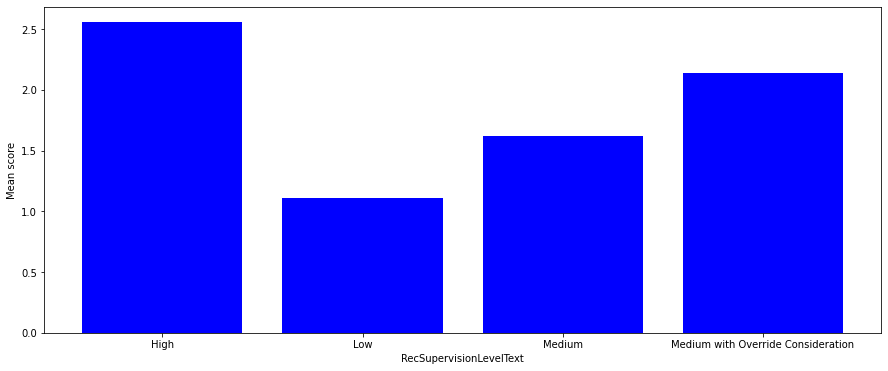

In [ ]:
# Insert your code here to plot a histogram by grouping recidivism supervision level (RecSupervisionLevelText) and the mean score (ScoreText)
df1 = df[['RecSupervisionLevelText', 'ScoreText']]
x1 = df1.groupby('RecSupervisionLevelText').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['RecSupervisionLevelText'])
plt.ylabel('Mean score')
plt.xlabel('RecSupervisionLevelText')

Plot a histogram between the custody status (CustodyStatus) and the mean score (ScoreText).


---

**1 Point**

--- 

Text(0.5, 0, 'CustodyStatus')

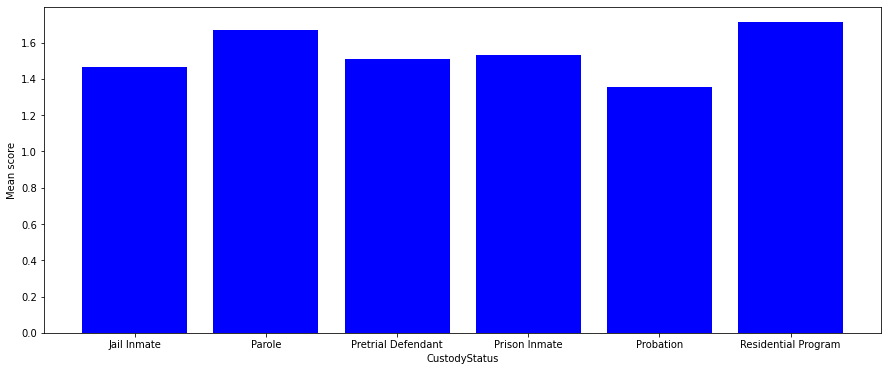

In [ ]:
# Insert your code here to plot a histogram by grouping custody status (CustodyStatus) and the mean score (ScoreText)
df1 = df[['CustodyStatus', 'ScoreText']]
x1 = df1.groupby('CustodyStatus').mean().reset_index()
plt.figure(figsize=(15,6))
plt.bar(range(len(x1)), x1['ScoreText'], color="blue")
plt.xticks(range(len(x1)), x1['CustodyStatus'])
plt.ylabel('Mean score')
plt.xlabel('CustodyStatus')

## Discretizing categorical attributes


---

As we have categorical attributes, we have to map them to a set of discrete values for processing by SVM. **Please don't make any changes to the block below.**



In [ ]:
# Transforming the Agency_Text into 0, 1, 2, 3
data_set['Agency_Text'] = data_set['Agency_Text'].map({'DRRD': 0, 'PRETRIAL': 1, 'Probation': 2, 'Broward County':3}).astype(int)
# Transforming the Gender into 0 and 1
data_set['Sex_Code_Text'] = data_set['Sex_Code_Text'].map({'Male': 0, 'Female': 1}).astype(int)
# Transforming the Ethnic_Code_Text into 0, 1, 2, 3, 4, 5, 6, 7,8
data_set['Ethnic_Code_Text'] = data_set['Ethnic_Code_Text'].map({'Caucasian': 0, 'African-American': 1, 'Hispanic': 2, 'Arabic':3, 'Asian':4,'Native American':5,'Oriental':6 , 'African-Am':7,'Other': 8}).astype(int)
# Transforming the LegalStatus into 0, 1, 2, 3, 4, 5,6 
data_set['LegalStatus'] = data_set['LegalStatus'].map({'Pretrial': 0, 'Post Sentence': 1, 'Conditional Release':2,'Deferred Sentencing':3,'Parole Violator':4,'Probation Violator':5,'Other': 6}).astype(int)
# Transforming the CustodyStatus into 0, 1, 2, 3, 4, 5
data_set['CustodyStatus'] = data_set['CustodyStatus'].map({'Jail Inmate': 0, 'Probation': 1, 'Pretrial Defendant': 2, 'Parole':3, 'Prison Inmate': 4, 'Residential Program':5}).astype(int)
# Transforming the marital status into 0, 1, 2, 3, 4, 5, 6
data_set['MaritalStatus'] = data_set['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2,'Separated':3,'Significant Other':4,'Unknown':5,'Widowed':6}).astype(int)

data_set




,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet_ID,ScaleSet,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,ScoreText
0,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
1,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,1
2,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,18,Risk of Failure to Appear,1
3,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,7,Risk of Violence,1
4,1,0,0,22,Risk and Prescreen,0,0,1,1,Low,8,Risk of Recidivism,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,8,Risk of Recidivism,3
60839,2,0,1,22,Risk and Prescreen,0,0,0,3,Medium with Override Consideration,18,Risk of Failure to Appear,3
60840,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,7,Risk of Violence,1
60841,1,0,0,22,Risk and Prescreen,0,0,0,1,Low,8,Risk of Recidivism,2


## Correlation matrix visualization


---

Plot a heatmap of the correlation matrix for all attributes. You may use the `seaborn` library.

---

**4 Points**

---



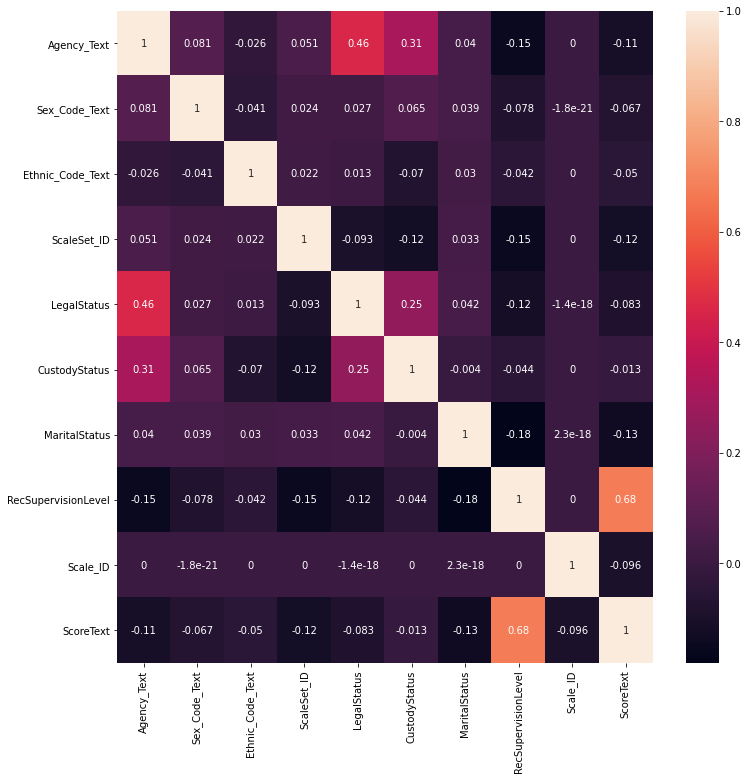

In [ ]:
# Insert your code here to plot the correlation matrix heatmap
plt.figure(figsize=(12, 12))
corrMatrix = data_set.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Consider only the attribute that has highest correlation with the target attribute `ScoreText`. Construct a reduced 1 dimensional dataset. Split it into train and test sets keeping 20% of the total data as the test set.

---

**3 Points**

---



In [ ]:
# Insert your code here to construct reduced 1D dataset
max_correlation = corrMatrix[corrMatrix['ScoreText'] == np.max(corrMatrix['ScoreText'].values[:-1])].index[0]
X = data_set[max_correlation].values.reshape(-1,1)
# Insert your code here to consider target attribute Y which is ScoreText attribute
Y = data_set['ScoreText'].values

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


We have 4 classes in our target attribute. Such multi class classification via SVM can be considered as binary classification in One Vs. Rest (OR) One Vs. One fashion. Use “one-vs-the-rest” SVC for classification. Justify its effect on the score obtained.


---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate the One Vs Rest SVM classifier
clf = SVC(decision_function_shape='ovr', kernel='linear')

# Insert your code here to fit the One Vs rest classifier on the training set
clf.fit(X_train, Y_train)

# Insert your code here to print the number of support vectors for each class
print("[C0 C1 C2 C3]")
print(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
y_test_preds = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Test accuracy  " + str(accuracy_score(Y_test, y_test_preds)))


[C0 C1 C2 C3]
[  34 9504 9974 3517]
Test accuracy  0.7446791026378503


***OBSERVATIONS***

We obtain a test accuracy of 74.46 when we use the OVR scheme, we train 4 OVR classifiers and see which one of them has the highest score

Repeat the same with One Vs One classification scheme. Justify its effect on the score obtained.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf = SVC(decision_function_shape='ovo', kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
clf.fit(X_train, Y_train)

# Insert your code here to print the number of support vectors for each class
print("[C0 C1 C2 C3]")
print(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
y_test_preds = clf.predict(X_test)

print("Test accuracy  " + str(accuracy_score(Y_test, y_test_preds)))


[C0 C1 C2 C3]
[  34 9504 9974 3517]
Test accuracy  0.7446791026378503


***OBSERVATIONS***

We obtain a test accuracy of 74.46 when we use the OVO scheme too, training 6 OVO classifiers. Moreover the number of support vectors is also the same. The possible reason for this is since both of them are learning a linear boundary for seperation on a low number of classes, both end up learning very similar classifiers, since even RecSupervisionLevel score has only 4 classes in it too.

Use “one-against-one” SVM classifier with RBF kernel for classification. Justify its effect on the score obtained.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf = SVC(decision_function_shape='ovo', kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
clf.fit(X_train, Y_train)

# Insert your code here to print the number of support vectors for each class
print(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
y_test_preds = clf.predict(X_test)

print("Test accuracy  " + str(accuracy_score(Y_test, y_test_preds)))

[  34 8612 8767 3293]
Test accuracy  0.7565124496671871


**OBSERVATIONS**

RBF is a very high dimensionality kernel and hence we can see it fits better than linear, which is very rigid and hence higher accuracy value. Also the support vectors are lesser than previous cases

Lets take some more features in decreasing order of correlation with ScoreText and check its effect on the score. Take top-7 correlated attributes and divide the data in 80:20 (train:test) fashion as done above.

---

**3 Points**

---





In [ ]:
# Insert your code here to construct the reduced dataset by taking top 7 most correlated attributes with the target attribute (ScoreText)
corrMatrix['ScoreText'][:-1].sort_values()
top_seven = corrMatrix['ScoreText'][:-1][-7:].keys()
print(top_seven)
X = data_set[top_seven].values

# Insert your code here to consider target attribute Y which is ScoreText attribute
Y = data_set['ScoreText'].values

# Insert your code here to split the dataset into train and test sets.
# Keep 20% of the total data as test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Index(['Ethnic_Code_Text', 'ScaleSet_ID', 'LegalStatus', 'CustodyStatus',
       'MaritalStatus', 'RecSupervisionLevel', 'Scale_ID'],
      dtype='object')


Use SVM One Vs One classifier with linear kernel for classification and justify the increase or decrease in the score and number of support vectors.


---

**4 Points**

---





In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with linear kernel
clf = SVC(decision_function_shape='ovo', kernel='linear')

# Insert your code here to train the One Vs One classifier using the training set
clf.fit(X_train, Y_train)

# Insert your code here to print the number of support vectors for each class
print(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
y_test_preds = clf.predict(X_test)

print("Test accuracy  " + str(accuracy_score(Y_test, y_test_preds)))

[  34 9310 9974 3377]
Test accuracy  0.7262716739255485


**OBSERVATION**

The linear decision boundary finds it hard to model the decision boundary as a result of which we can see the accuracy has decreased. We can hence say that in case of this example adding these extra features work like noise, in case of linear boundary.

Support vectors = 22695 :- Less seperability, more support vectors



Repeat the same with RBF kernel and justify the increase or decrease in the score and number of support vectors.

---

**4 Points**

---



In [ ]:
# Insert your code here to instantiate a One Vs One SVM classifier with RBF kernel
clf = SVC(decision_function_shape='ovo', kernel='rbf')

# Insert your code here to train the One Vs One classifier with RBF kernel using the training set
clf.fit(X_train, Y_train)

# Insert your code here to print the number of support vectors for each class
print(clf.n_support_)

# Insert your code here to print the prediction accuracy of the classifier on the test set.
y_test_preds = clf.predict(X_test)

print("Test accuracy  " + str(accuracy_score(Y_test, y_test_preds)))

[  34 8824 9972 3390]
Test accuracy  0.8216780343495768


**OBSERVATION**

The maximum accuracy that we obtain yet, the RBF kernel works well with the top 7 features. As the correlation was very low for all features except RecSupervisionLevel, we can say the linear boundary was not a good model for this set. The RBF kernel is able to better model the example. 

Support vectors = 22220 
The decrease might be attributed to more seperability in this case